In [8]:

import pandas as pd

df = pd.read_csv('05_segmentacao_rfm_final.sql.csv')
df.head()

,customer_unique_id,recencia_dias,frequencia,valor_total_gasto,r_score,f_score,m_score,rfm_score_completo,segmento
0,f2c2365cab7dc57ab8c90f9c3bee015a,72,1,209.46,5,5,5,555,Campeões
1,4fbbe3e555c12c6fb7184b3e2d04fb49,132,1,209.96,5,5,5,555,Campeões
2,f2c10bd6c35a005af95c9c000b3cfd9d,134,1,229.28,5,5,5,555,Campeões
3,b4d20b907a61795e8c8f3a7966c6cfb9,125,2,249.60,5,5,5,555,Campeões
4,934157f44075d9ca396f27f72c99a338,128,1,333.45,5,5,5,555,Campeões


In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93358 entries, 0 to 93357
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  93358 non-null  object 
 1   recencia_dias       93358 non-null  int64  
 2   frequencia          93358 non-null  int64  
 3   valor_total_gasto   93358 non-null  float64
 4   r_score             93358 non-null  int64  
 5   f_score             93358 non-null  int64  
 6   m_score             93358 non-null  int64  
 7   rfm_score_completo  93358 non-null  int64  
 8   segmento            93358 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 6.4+ MB


,recencia_dias,frequencia,valor_total_gasto,r_score,f_score,m_score,rfm_score_completo
count,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000,93358.000000
mean,286.478877,1.033420,165.197003,2.999968,2.999968,2.999968,332.996433
std,152.595054,0.209097,226.314012,1.414217,1.414217,1.414217,142.364772
min,49.000000,1.000000,0.000000,1.000000,1.000000,1.000000,111.000000
25%,163.000000,1.000000,63.052500,2.000000,2.000000,2.000000,222.000000
50%,267.000000,1.000000,107.780000,3.000000,3.000000,3.000000,333.000000
75%,395.000000,1.000000,182.557500,4.000000,4.000000,4.000000,444.000000
max,762.000000,15.000000,13664.080000,5.000000,5.000000,5.000000,555.000000


In [ ]:
df['segmento'].value_counts()

segmento
Precisam de Atenção    63178
Em Risco               15187
Campeões                7615
Clientes Leais          7378
Name: count, dtype: int64

In [14]:
analise_por_segmento = df.groupby('segmento').agg(
	med_r_dias = ('recencia_dias', 'mean'),
	med_f_ = ('frequencia', 'mean'),
	med_valor_gasto = ('valor_total_gasto', 'mean'),
	cont_client = ('customer_unique_id', 'count'),
).sort_values(by='med_valor_gasto', ascending=False)

analise_por_segmento = analise_por_segmento.round(2)

analise_por_segmento

,med_r_dias,med_f_,med_valor_gasto,cont_client
segmento,,,,
Clientes Leais,183.69,1.09,179.66,7378
Campeões,94.43,1.09,178.28,7615
Em Risco,444.39,1.00,163.46,15187
Precisam de Atenção,283.67,1.03,162.35,63178


Dia 04 -  Data Viz

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\agatha.costa\AppData\Local\Temp\ipykernel_23824\1896749296.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


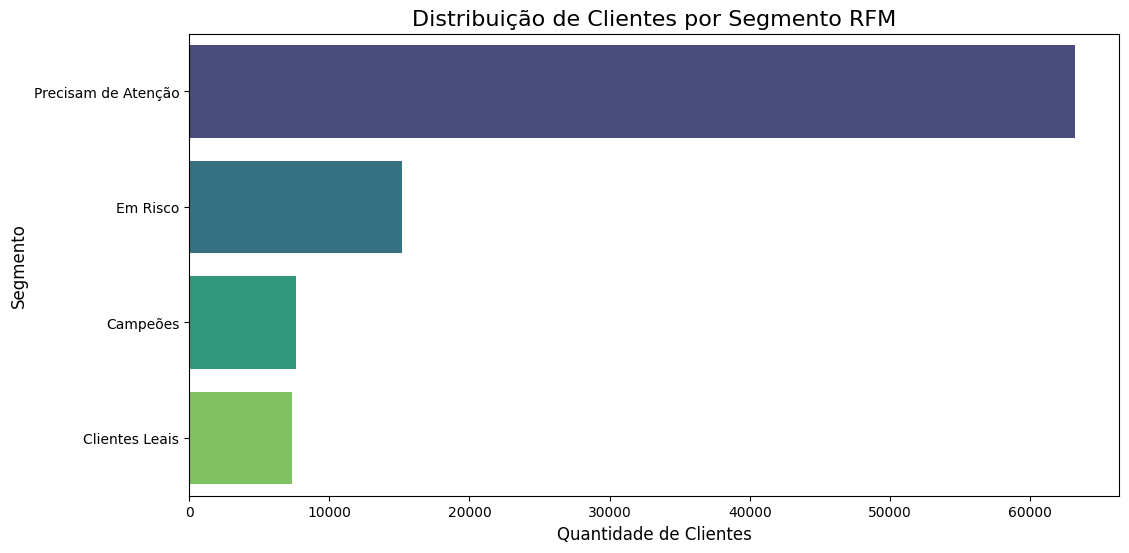

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='cont_client', 
    y='segmento', 
    data=analise_por_segmento.sort_values(by='cont_client', ascending=False),
    palette='viridis'
)

plt.title('Distribuição de Clientes por Segmento RFM', fontsize=16)
plt.xlabel('Quantidade de Clientes', fontsize=12)
plt.ylabel('Segmento', fontsize=12)
plt.show()

C:\Users\agatha.costa\AppData\Local\Temp\ipykernel_23824\1463083906.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


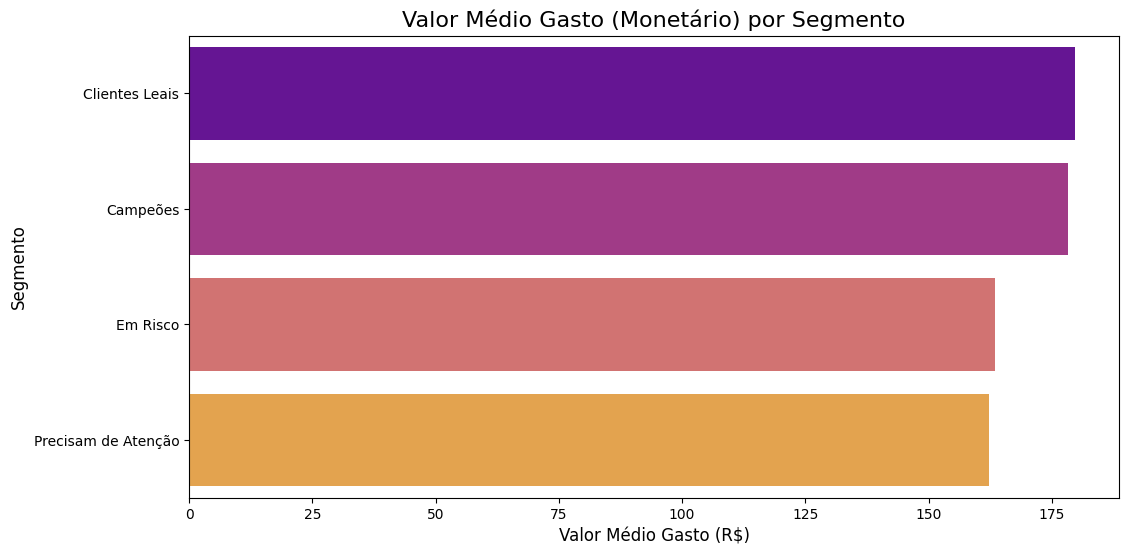

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='med_valor_gasto', 
    y='segmento', 
    data=analise_por_segmento, # analise_final já está ordenada por media_valor_gasto
    palette='plasma'
)

plt.title('Valor Médio Gasto (Monetário) por Segmento', fontsize=16)
plt.xlabel('Valor Médio Gasto (R$)', fontsize=12)
plt.ylabel('Segmento', fontsize=12)
plt.show() 

In [1]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
st.set_page_config(layout="wide") 
st.title('Dashboard Interativo de Segmentação RFM 🏆')
df_rfm = pd.read_csv('05_segmentacao_rfm_final.sql.csv')
st.write("Análise dos segmentos de clientes da Olist.")

2025-08-02 19:24:54.448 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 19:24:54.451 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 19:24:54.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 19:24:54.455 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 19:24:54.611 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 19:24:54.612 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 19:24:54.612 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
